In [218]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

Basic data Analysis

In [219]:
df = pd.read_csv("cars_ridge.csv")
df.head()

,mileage,engine_size,horsepower,torque,doors,airbags,weight,fuel_efficiency,brand_score,luxury_index,price_k
0,82693.0,2.07,97.0,146.0,4,7,1870.0,27.1,5.6,3.5,53.3
1,106256.0,3.46,212.0,263.0,4,7,2055.0,23.0,7.5,4.6,61.4
2,100445.0,2.69,151.0,247.0,2,2,2059.0,22.2,3.8,2.4,53.5
3,55616.0,1.33,73.0,132.0,4,2,1631.0,30.4,4.6,3.7,34.1
4,74804.0,1.48,60.0,193.0,4,7,1476.0,30.4,5.0,3.8,38.3


In [220]:
df.shape

(150, 11)

In [221]:
df.dtypes

mileage            float64
engine_size        float64
horsepower         float64
torque             float64
doors                int64
airbags              int64
weight             float64
fuel_efficiency    float64
brand_score        float64
luxury_index       float64
price_k            float64
dtype: object

In [222]:
df.isnull().sum()

mileage            0
engine_size        0
horsepower         0
torque             0
doors              0
airbags            0
weight             0
fuel_efficiency    0
brand_score        0
luxury_index       0
price_k            0
dtype: int64

In [223]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analysis (EDA)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mileage          150 non-null    float64
 1   engine_size      150 non-null    float64
 2   horsepower       150 non-null    float64
 3   torque           150 non-null    float64
 4   doors            150 non-null    int64  
 5   airbags          150 non-null    int64  
 6   weight           150 non-null    float64
 7   fuel_efficiency  150 non-null    float64
 8   brand_score      150 non-null    float64
 9   luxury_index     150 non-null    float64
 10  price_k          150 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 13.0 KB


In [225]:
df.describe()

,mileage,engine_size,horsepower,torque,doors,airbags,weight,fuel_efficiency,brand_score,luxury_index,price_k
count,150.000000,150.000000,150.000000,150.0000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,61051.673333,1.973933,120.553333,177.8200,3.506667,5.493333,1791.600000,27.149333,5.144667,4.011333,46.103333
std,19329.031418,0.598233,37.128389,58.6712,0.865030,2.325080,291.986232,3.214726,2.009793,1.925893,12.005320
min,14810.000000,0.800000,60.000000,80.0000,2.000000,2.000000,1190.000000,17.900000,1.000000,0.000000,-2.700000
25%,49351.500000,1.562500,90.000000,138.7500,4.000000,3.000000,1601.250000,24.900000,3.700000,2.900000,39.900000
50%,60852.000000,1.930000,120.000000,168.5000,4.000000,5.000000,1788.000000,27.050000,5.100000,4.150000,46.700000
75%,74609.750000,2.377500,145.750000,214.0000,4.000000,7.000000,1944.750000,29.375000,6.500000,5.400000,53.475000
max,106256.000000,3.510000,220.000000,386.0000,4.000000,9.000000,2511.000000,34.700000,10.000000,8.200000,81.200000


In [226]:
df.columns

Index(['mileage', 'engine_size', 'horsepower', 'torque', 'doors', 'airbags',
       'weight', 'fuel_efficiency', 'brand_score', 'luxury_index', 'price_k'],
      dtype='object')

Skewness of numeric columns:
 mileage           -0.111364
engine_size        0.303468
horsepower         0.359979
torque             0.589590
doors             -1.187273
airbags           -0.010899
weight             0.226092
fuel_efficiency   -0.040653
brand_score        0.047838
luxury_index      -0.065401
price_k           -0.277565
dtype: float64


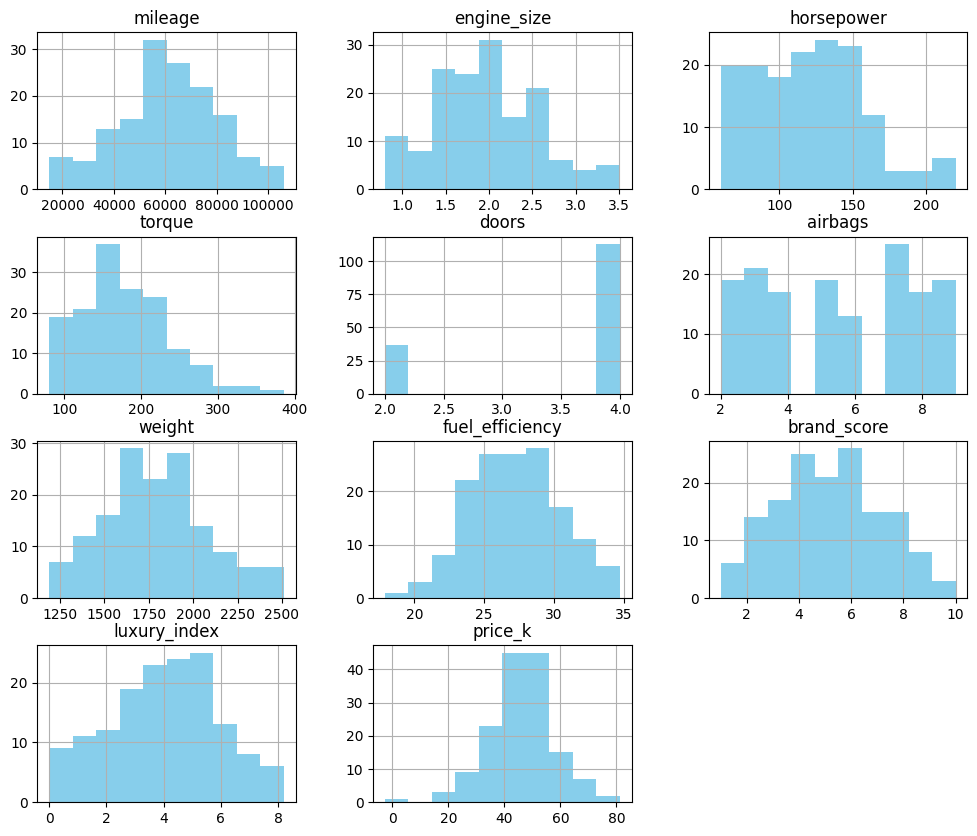

In [227]:
numeric_cols = ['mileage', 'engine_size', 'horsepower', 'torque', 'doors', 'airbags', 'weight', 'fuel_efficiency', 'brand_score', 'luxury_index', 'price_k']
skewness = df[numeric_cols].skew()
print("Skewness of numeric columns:\n", skewness)

df[numeric_cols].hist(figsize=(12,10), color='skyblue')
plt.show()

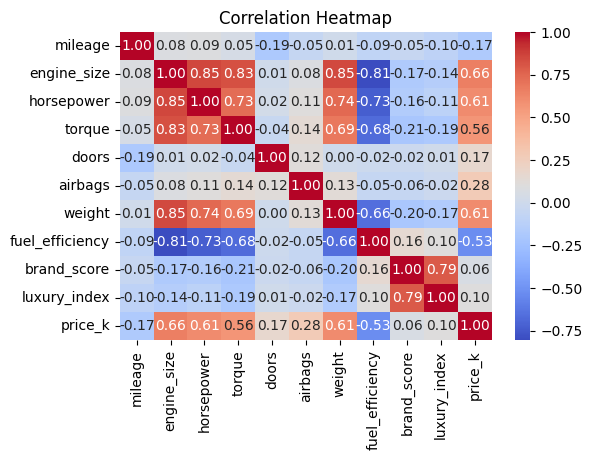

In [228]:
numeric_cols = ['mileage', 'engine_size', 'horsepower', 'torque', 'doors', 'airbags', 'weight', 'fuel_efficiency', 'brand_score', 'luxury_index', 'price_k']
cor = df[numeric_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(cor, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Data Preprocessing

Skewness after log transform:
-0.37209904163780894


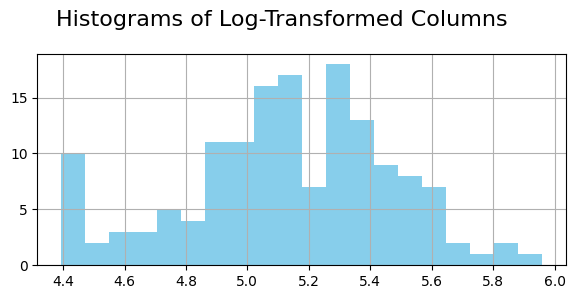

In [229]:
df['torque'] = np.log1p(df['torque'])
print("Skewness after log transform:")
print(df['torque'].skew())

df['torque'].hist(figsize=(6,3), color='skyblue', bins=20)
plt.suptitle("Histograms of Log-Transformed Columns", fontsize=16)
plt.tight_layout()
plt.show()

mileage: 0 outliers
engine_size: 0 outliers
horsepower: 0 outliers
torque: 0 outliers
doors: 37 outliers
airbags: 0 outliers
weight: 1 outliers
fuel_efficiency: 1 outliers
brand_score: 0 outliers
luxury_index: 0 outliers
price_k: 4 outliers


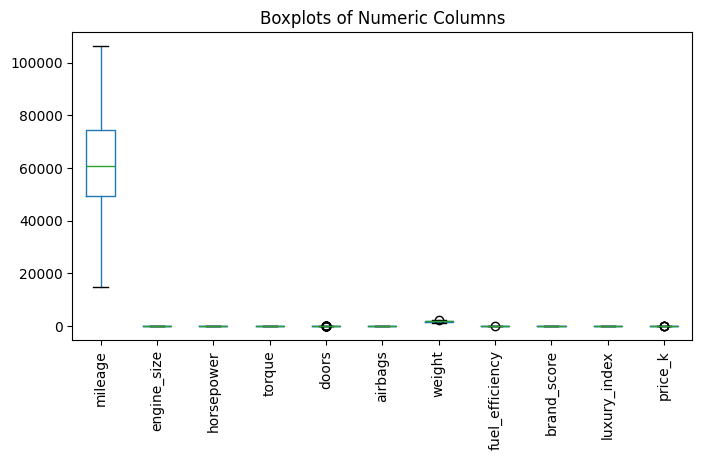

In [230]:
numeric_cols = ['mileage', 'engine_size', 'horsepower', 'torque', 'doors', 'airbags', 'weight', 'fuel_efficiency', 'brand_score', 'luxury_index', 'price_k']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers_count = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers_count} outliers")

plt.figure(figsize=(8,4))
df.boxplot(column=numeric_cols, grid=False)
plt.xticks(rotation=90)
plt.title("Boxplots of Numeric Columns")
plt.show()

In [231]:
discrete_cols = ['doors']
continuous_cols = ['weight', 'fuel_efficiency']

# Handle discrete columns (replace outliers with mode)
for col in discrete_cols:
    mode_val = df[col].mode()[0]
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df[col] = df[col].apply(lambda x: mode_val if x < Q1 - 1.5*IQR or x > Q3 + 1.5*IQR else x)

# Handle continuous columns (cap outliers)
for col in continuous_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df[col] = df[col].clip(lower=Q1 - 1.5*IQR, upper=Q3 + 1.5*IQR)

In [232]:
for col in discrete_cols + continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers remaining")

doors: 0 outliers remaining
weight: 0 outliers remaining
fuel_efficiency: 0 outliers remaining


In [233]:
df.head()

,mileage,engine_size,horsepower,torque,doors,airbags,weight,fuel_efficiency,brand_score,luxury_index,price_k
0,82693.0,2.07,97.0,4.990433,4,7,1870.0,27.1,5.6,3.5,53.3
1,106256.0,3.46,212.0,5.575949,4,7,2055.0,23.0,7.5,4.6,61.4
2,100445.0,2.69,151.0,5.513429,4,2,2059.0,22.2,3.8,2.4,53.5
3,55616.0,1.33,73.0,4.890349,4,2,1631.0,30.4,4.6,3.7,34.1
4,74804.0,1.48,60.0,5.267858,4,7,1476.0,30.4,5.0,3.8,38.3


Feature Selection

In [234]:
X =  df[['mileage', 'engine_size', 'horsepower', 'torque', 'doors','airbags', 'weight', 'fuel_efficiency', 'brand_score', 'luxury_index']]
y = df['price_k']

In [235]:
print("Selected Features:")
X.columns.tolist()

Selected Features:


['mileage',
 'engine_size',
 'horsepower',
 'torque',
 'doors',
 'airbags',
 'weight',
 'fuel_efficiency',
 'brand_score',
 'luxury_index']

In [236]:
print("Target Variable: price_k")

Target Variable: price_k


Train-Test Split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and Testing Data Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Training and Testing Data Shapes:
X_train: (120, 10)
X_test: (30, 10)


Scaling features

In [238]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fit Linear Regression

In [239]:
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [240]:
y_pred_ols = ols.predict(X_test_scaled)

r2_ols = r2_score(y_test, y_pred_ols)
rmse_ols = np.sqrt(mean_squared_error(y_test, y_pred_ols))
ols_df_coef = pd.DataFrame({'Feature': X.columns,'OLS Coefficient': ols.coef_})

Evaluate the OLS Model

In [241]:
print("OLS Model Performance:")
print("R² Score:", r2_ols)
print("RMSE:", rmse_ols)
print(ols_df_coef)
print("Intercept:", ols.intercept_)

OLS Model Performance:
R² Score: 0.5030120690547037
RMSE: 7.713878967621849
           Feature  OLS Coefficient
0          mileage    -2.029248e+00
1      engine_size     4.294324e+00
2       horsepower     1.407307e+00
3           torque     1.839728e+00
4            doors     2.220446e-15
5          airbags     2.142884e+00
6           weight     1.942454e+00
7  fuel_efficiency     3.144904e-01
8      brand_score     5.274711e-01
9     luxury_index     2.297885e+00
Intercept: 46.423333333333325


Fit RidgeCV

In [242]:
alphas = np.logspace(-3, 3, 50)
ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=10)
ridge_cv.fit(X_train_scaled, y_train)

,alphas,array([1.0000...00000000e+03])
,fit_intercept,True
,scoring,'r2'
,cv,10
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [243]:
y_pred_ridge = ridge_cv.predict(X_test_scaled)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_df_coef = pd.DataFrame({'Feature': X.columns,'Ridge Coefficient': ridge_cv.coef_})

Evaluate the RigdeCV Model

In [244]:
print("Ridge Model Performance:")
print("R² Score:", r2_ridge)
print("RMSE:", rmse_ridge)
print(ridge_df_coef)
print("Intercept:", ridge_cv.intercept_)

Ridge Model Performance:
R² Score: 0.4860537872504671
RMSE: 7.8443819974512365
           Feature  Ridge Coefficient
0          mileage          -1.324906
1      engine_size           2.078153
2       horsepower           1.657461
3           torque           1.712991
4            doors           0.000000
5          airbags           1.532889
6           weight           1.928384
7  fuel_efficiency          -0.925415
8      brand_score           0.762075
9     luxury_index           1.398117
Intercept: 46.423333333333325


Final Comparison

In [245]:
print("Final Comparison:")
print("Ridge R²:", r2_ridge, " | OLS R²:", r2_ols)
print("Ridge RMSE:", rmse_ridge, " | OLS RMSE:", rmse_ols)

Final Comparison:
Ridge R²: 0.4860537872504671  | OLS R²: 0.5030120690547037
Ridge RMSE: 7.8443819974512365  | OLS RMSE: 7.713878967621849


Residual vs Actual

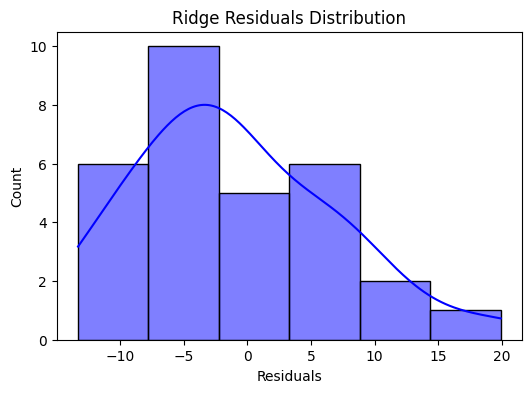

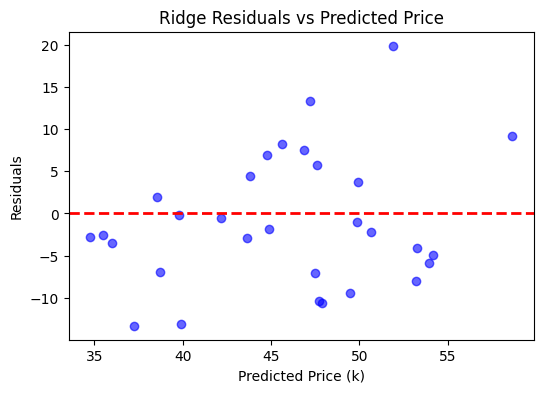

In [246]:
residuals_ridge = y_test - y_pred_ridge

plt.figure(figsize=(6,4))
sns.histplot(residuals_ridge, kde=True, color='blue')
plt.title("Ridge Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred_ridge, residuals_ridge, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Price (k)")
plt.ylabel("Residuals")
plt.title("Ridge Residuals vs Predicted Price")
plt.show()